#                                                         Analisis de ventas

## Primer proyecto de analisis de datos

En el siguiente proyecto estaremos analizando las ventas, calculando los promedios de ventas, viendo la relacion entre los productos vendidos y sus compradores y graficaremos las distinas categorias de ventas

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Cleaning data / Limpiando datos
# Setting max rows / Seteamos la maxima cantidad de filas

pd.options.display.max_rows = None
# Getting the file / Traigo el archivo
df = pd.read_csv('Python/archive/data.csv', encoding = 'latin1')
# Delete null entries / Eliminar entradas nulas
df.dropna(inplace= True)
# Format date / Formateo fechas
df['Order Date'] = pd.to_datetime(df['Order Date'], format = 'mixed')
df['Ship Date']  = pd.to_datetime(df['Ship Date'], format = 'mixed')

Lo primero que hacemos es limpiar los datos. Comprobamos queno hayan datos nulos y formateamos las fechas correctamente

## A continuacion, calculamos el promedio de ventas totales

In [20]:
sales_mean = round(df['Sales'].mean(), 2)
print(f'Sales mean: $ {sales_mean}')

Sales mean: $ 229.86


Vemos que el promedio de ventas es de $229.86 del total de ventas

Tambien vamos a calcular el promedio de profit de las ventas, y calcularemos la mediana para las mismas celdas

In [21]:
profit_mean = round(df['Profit'].mean(), 2)
print(f'Profit mean: $ {profit_mean}')

Profit mean: $ 28.66


In [22]:
sales_median = round(df['Sales'].median() , 2)
print(f'Sales median: $ {sales_median}')

Sales median: $ 54.49


In [23]:
profit_median = round(df['Profit'].median(), 2)
print(f'Profit median: $ {profit_median}')

Profit median: $ 8.67


# Analisis de ventas totales

In [24]:
total_sales = round(df['Sales'].sum(), 2)
print(f'Total sales: $ {total_sales}')

Total sales: $ 2297200.86


## Ventas totales: $ 2297200.86

# Analisis de profit total

In [25]:
total_profit = round(df['Profit'].sum(), 2)
print(f'Total profit: $ {total_profit}')

Total profit: $ 286397.02


## Profit total: $ 286397.02

# Analizaremos la distribucion por region en las ventas 

In [26]:
region_stats = pd.DataFrame({
    'Count': df['Region'].value_counts(),
    'Percentage': df['Region'].value_counts(normalize=True) * 100
})
print(region_stats)

         Count  Percentage
Region                    
West      3203   32.049230
East      2848   28.497098
Central   2323   23.243946
South     1620   16.209726


## A continuacion vamos a graficarlo para verlo mejor

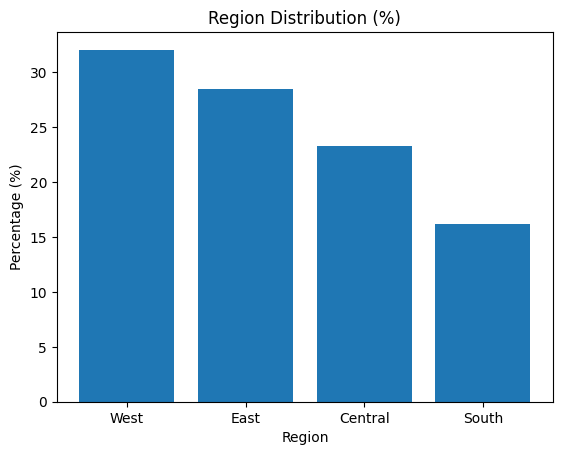

In [27]:
plt.bar(region_stats.index, region_stats['Percentage'])
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.title('Region Distribution (%)')
plt.show()

Podemos observar que la region que mas compras realizo es la zona Oeste, alcanzando el 32% del total de ventas, mientras que la zona que menos 
compro fue la zona Sur, con aproximadamente un 16% de las ventas totales.

## Ahora, veremos las ventas por categoria

In [28]:
category_stats_percentage = pd.DataFrame({
    'Count': df['Category'].value_counts(),
    'Percentage': df['Category'].value_counts(normalize=True) * 100
})
print(category_stats_percentage)

                 Count  Percentage
Category                          
Office Supplies   6026   60.296178
Furniture         2121   21.222734
Technology        1847   18.481089


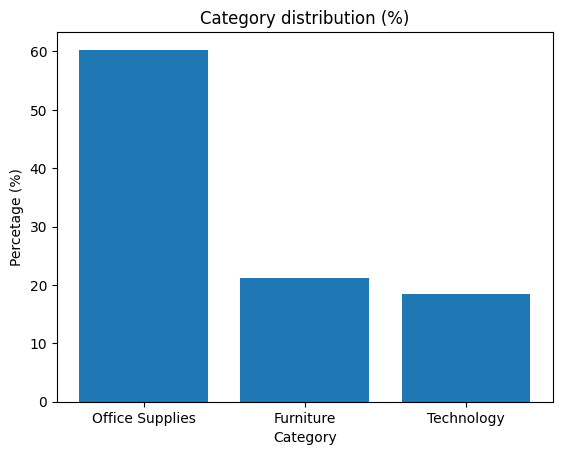

In [29]:
plt.bar(category_stats_percentage.index, category_stats_percentage['Percentage'])
plt.xlabel('Category')
plt.ylabel('Percetage (%)')
plt.title('Category distribution (%)')
plt.show()

Con los datos obtenidos, vemos que lo que mas se vendio fueron articulos de oficina con el 60% de las ventas, mientras que articulos de tecnologia solo alcanza el 18%.

## Si lo vemos por sub-categorias

In [30]:
sub_category_stats = pd.DataFrame({
    'Count': df['Sub-Category'].value_counts(),
    'Percentage': df['Sub-Category'].value_counts(normalize=True) * 100
})
print(sub_category_stats)

              Count  Percentage
Sub-Category                   
Binders        1523   15.239143
Paper          1370   13.708225
Furnishings     957    9.575745
Phones          889    8.895337
Storage         846    8.465079
Art             796    7.964779
Accessories     775    7.754653
Chairs          617    6.173704
Appliances      466    4.662798
Labels          364    3.642185
Tables          319    3.191915
Envelopes       254    2.541525
Bookcases       228    2.281369
Fasteners       217    2.171303
Supplies        190    1.901141
Machines        115    1.150690
Copiers          68    0.680408


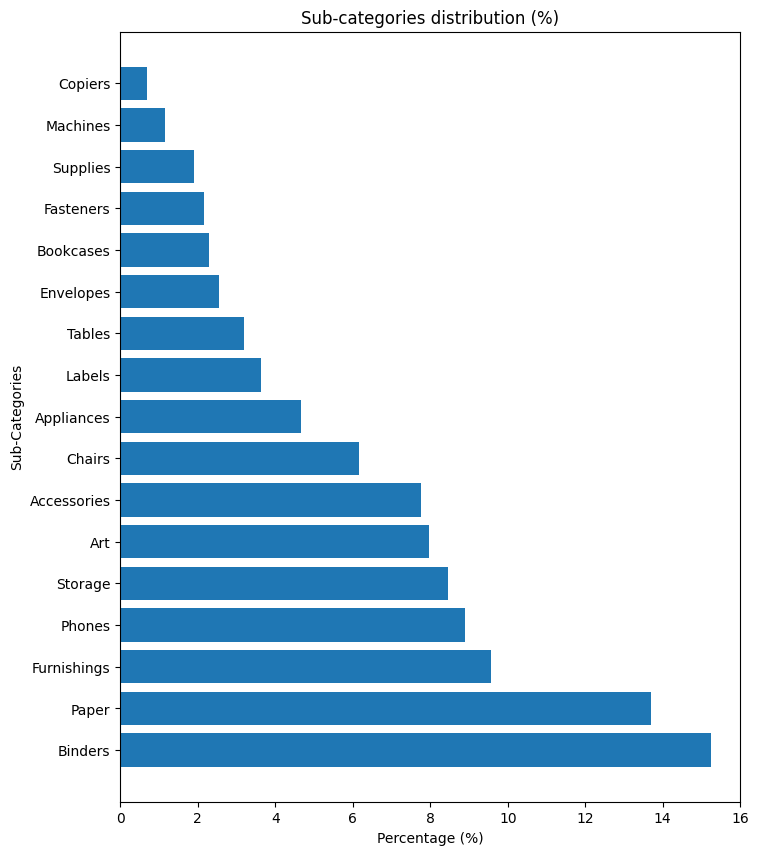

In [31]:
plt.figure(figsize=(8,10))  # más alto
plt.barh(sub_category_stats.index, sub_category_stats['Percentage'])
plt.xlabel('Percentage (%)')
plt.ylabel('Sub-Categories')
plt.title('Sub-categories distribution (%)')
plt.show()

Vemos como se reparten las ventas por sub-categorias, siendo "Binders" el articulo mas vendido, alcanzando un 15% aproximado de las ventas.

# Analizamos la evolucion de las ventas a traves de los dias

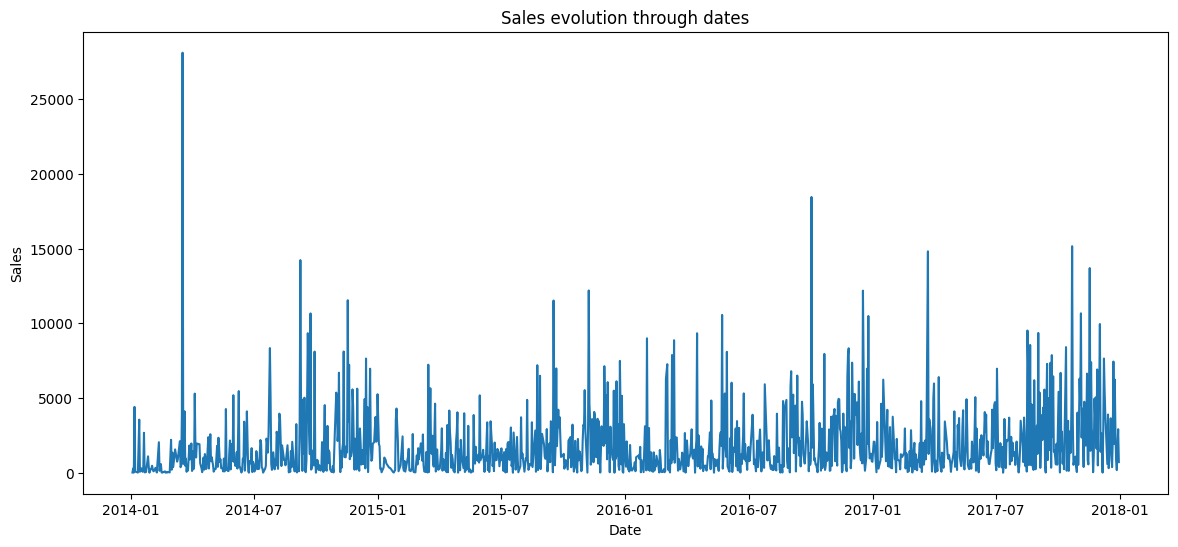

In [32]:
sales_over_time = df.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(14,6))
plt.plot(sales_over_time.index, sales_over_time.values)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales evolution through dates')
plt.show()

Con este grafico, vemos como se han comportado las ventas a traves de los dias. Podemos ver que el primer semestre del 2014 hubo un pico
de ventas que supero las 25000. Notamos tambien que suele haber un pico de compras cerca de las 13000 ventas para los segundos semestres,
incluso a veces llegando a las 15000 ventas y superandolas.

# Relacion entre Ventas - Beneficio

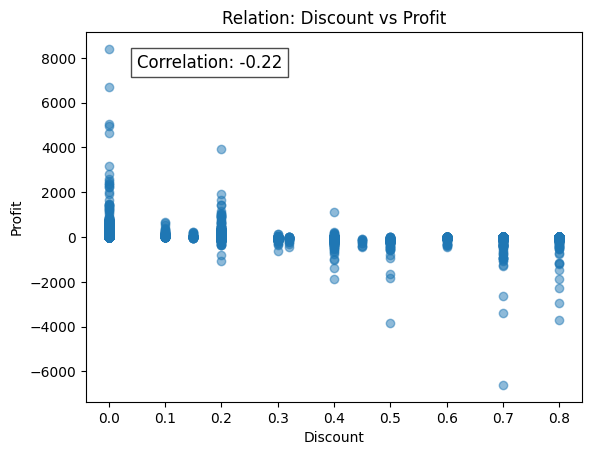

In [33]:
correlation = df['Discount'].corr(df['Profit'])

plt.scatter(df['Discount'], df['Profit'], alpha=0.5)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Relation: Discount vs Profit')
plt.text( 0.05,                          
    df['Profit'].max() * 0.9,      
    f'Correlation: {correlation:.2f}',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.7))
plt.show()

En este grafico de puntos podemos ver como se comportan las ganancias a medida que aumentan los descuentos. Notamos que hay una 
correlacion de -0.22, lo cual nos indica que a mayor monto de descuento, menor es la ganancia total.

# Top 10 vendedores

## Por ultimo, vamos a analizar el top 10 de vendedores mediante una grafica de barras.

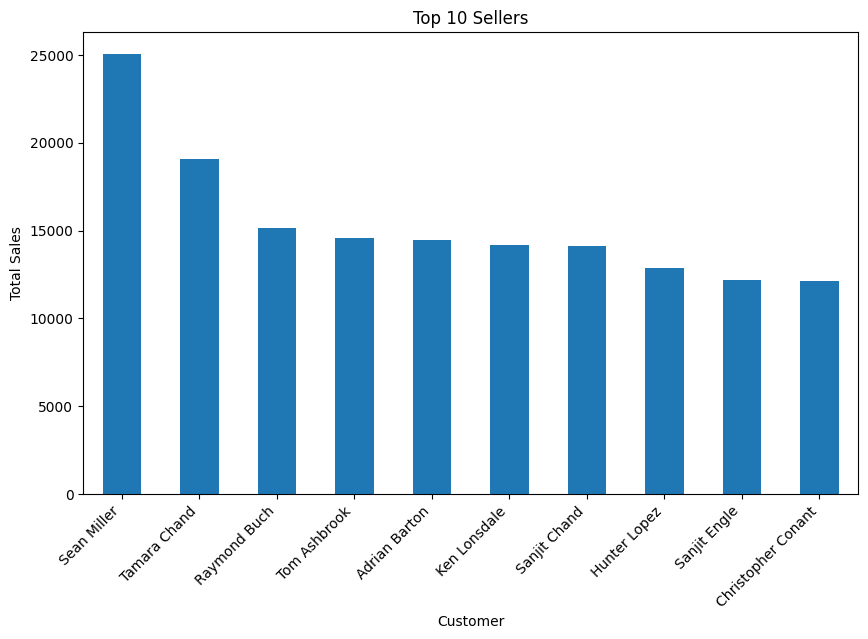

In [34]:
sales_by_customer = df.groupby('Customer Name')['Sales'].sum()
sales_by_customer = sales_by_customer.sort_values(ascending=False)
top10_customers = sales_by_customer.head(10)
top10_customers.plot(kind='bar', figsize=(10,6))
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.title('Top 10 Sellers')
plt.xticks(rotation=45, ha='right')
plt.show()

Vemos que 'Sean Miller' alcanzo las 25000 ventas, siendo el mejor vendedor, siendo el segundo 'Tamara Chand' alcanzando las 19000 ventas
aproximadamente. Luego podemos ver que los 8 restantes se mantuvieron en torno a las 14000 ventas.